<a href="https://colab.research.google.com/github/leenasilvoster/SVM/blob/main/svm_multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SVM for multi-class classification using built-in one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = SVC(decision_function_shape='ovo')
# fit model
model.fit(X, y)
# make predictions
yhat = model.predict(X)

In [ ]:
# SVM for multi-class classification using one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = SVC()
# define ovo strategy
ovo = OneVsOneClassifier(model)
# fit model
ovo.fit(X, y)
# make predictions
yhat = ovo.predict(X)

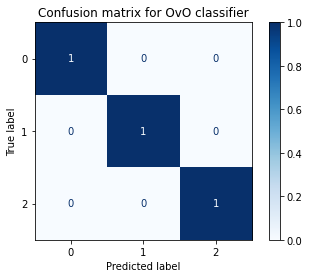

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


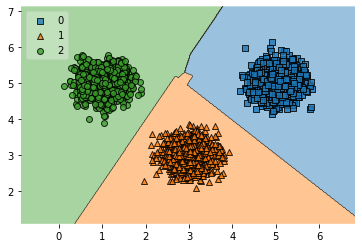

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

# Configuration options
num_samples_total = 10000
cluster_centers = [(5,5), (3,3), (1,5)]
num_classes = len(cluster_centers)

# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.30)

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# np.save('./clusters.npy', X)
#X = np.load('./clusters.npy')

# Create the SVM
svm = LinearSVC(random_state=42)

# Make it an OvO classifier
ovo_classifier = OneVsOneClassifier(svm)

# Fit the data to the OvO classifier
ovo_classifier = ovo_classifier.fit(X_train, y_train)

# Evaluate by means of a confusion matrix
matrix = plot_confusion_matrix(ovo_classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for OvO classifier')
plt.show(matrix)
plt.show()

# Plot decision boundary
plot_decision_regions(X_test, y_test, clf=ovo_classifier, legend=2)
plt.show()